In [74]:
from keras.datasets import mnist

data=mnist.load_data()

In [75]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

Define Training and Testing Data


In [76]:
((x_train,y_train),(x_test,y_test))=data

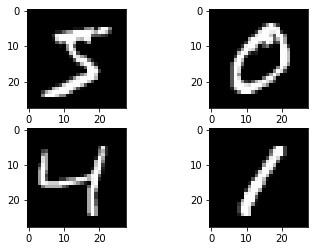

In [77]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3],cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [79]:
# shape of training data
x_train[0].shape

(28, 28)

In [80]:

x_train.shape

(60000, 28, 28)

In [81]:
# Reshape the training data
x_train=x_train.reshape((x_train.shape[0],28*28)).astype('float32')
x_test=x_test.reshape((x_test.shape[0],28*28)).astype('float32')

In [82]:

# Normalizing value from 0-255 to 0-1
x_train=x_train/255
x_test=x_test/255

In [83]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
from keras.utils import np_utils

print(y_test.shape)

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]
print(y_test.shape)

(10000,)
(10000, 10)


In [85]:
from keras.models import Sequential
from keras.layers import Dense

In [86]:
# Define model
model=Sequential()

# Add first hidden layer
model.add(Dense(32,input_dim=28*28,activation='relu'))

# Add second hidden layer
model.add(Dense(64,activation='relu'))

# Add output layer having 10 neurans (since there are 10 classes/categories in)
model.add(Dense(10,activation='softmax'))

In [87]:
# compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [88]:
# print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(x_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.7809 - accuracy: 0.7815
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1855 - accuracy: 0.9469
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1452 - accuracy: 0.9572
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1241 - accuracy: 0.9630
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.9666
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9720
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9744
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9779
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9778
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9823

Check model performance

In [90]:
scores=model.evaluate(x_test,y_test)
print(scores)   #returns loss and accuracy

313/313 [==============================] - 0s 940us/step - loss: 0.1081 - accuracy: 0.9687
[0.10809604823589325, 0.9686999917030334]


Make Prediction for testing data

In [93]:
prediction=model.predict(x_test)

# Convert prediction to lables
label=[]
for pred in prediction:
  max_val=max(pred)
  for (i,p) in enumerate(pred):
    print(p,i)

Streaming output truncated to the last 5000 lines.
0 3.040163e-07
1 1.7457722e-05
2 0.70297825
3 0.1933229
4 2.50645e-09
5 2.8089563e-08
6 1.6765679e-09
7 0.103669085
8 9.047408e-06
9 2.881199e-06
0 3.2331277e-10
1 2.691894e-07
2 2.1035636e-10
3 0.99834657
4 1.5302562e-07
5 2.1492659e-07
6 1.0162695e-12
7 5.1476312e-05
8 8.375826e-06
9 0.0015929305
0 5.67403e-09
1 6.471105e-08
2 2.0633486e-08
3 2.0611616e-08
4 0.9996524
5 2.3991937e-12
6 2.3993434e-09
7 0.0003291215
8 3.2174614e-06
9 1.5183125e-05
0 1.4765e-07
1 2.298587e-09
2 2.0967254e-07
3 3.5496612e-08
4 5.756177e-06
5 0.9972486
6 8.778993e-05
7 1.5466888e-07
8 0.0025113106
9 0.00014588606
0 4.287521e-09
1 4.408809e-11
2 9.239978e-11
3 3.249017e-11
4 3.0286627e-09
5 7.444391e-09
6 1.0
7 1.5596241e-11
8 2.964039e-09
9 1.0638528e-12
0 9.137629e-07
1 7.503563e-06
2 0.07244516
3 0.00055796327
4 5.0164566e-09
5 2.5253092e-07
6 4.2377084e-09
7 0.9268445
8 0.00013542031
9 8.370231e-06
0 6.3174934e-06
1 1.2945832e-10
2 9.7079685e-08
3 1.12